#Training a multilayer perceptron with MNIST dataset

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

##Dataset

In [2]:
#Normalizing the variables
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

In [3]:
trainset = datasets.MNIST('data/', download=True, transform = transform, train=True)
valset = datasets.MNIST('data/', download=True, transform = transform, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
print(len(valset))
len(trainset)

10000


60000

In [5]:
len(valset[0])

2

In [6]:
type(valset[0][0]), type(valset[0][1])

(torch.Tensor, int)

In [7]:
valset[0][0].squeeze().shape

torch.Size([28, 28])

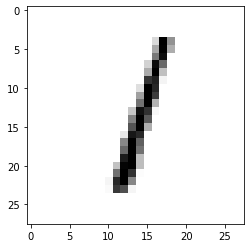

In [8]:
plt.imshow(valset[2][0].squeeze(), cmap="gray_r")

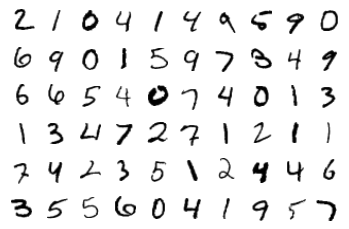

In [9]:
figure = plt.figure()
num_of_images = 60
for i in range(1, num_of_images + 1):
  plt.subplot(6, 10, i)
  plt.axis('off')
  plt.imshow(valset[i][0].squeeze(), cmap="gray_r")

##Model

In [19]:
from torch import nn
class MyAwesomeModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear1 = nn.Linear(784, 200)
    self.linear2 = nn.Linear(200,64)
    self.linear3 = nn.Linear(64, 10)

    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    z2 = self.linear1(x)
    a2 = nn.Sigmoid()(z2)

    z3 = self.linear2(a2)
    a3 = nn.Sigmoid()(z3)

    out = self.linear3(a3)
    out = self.softmax(out)
    return out

In [44]:
model = MyAwesomeModel()
test_img = valset[67][0].view(-1).unsqueeze(0)
test_img.shape
output = model(test_img)

In [45]:
output

tensor([[0.1054, 0.0867, 0.1165, 0.1179, 0.0787, 0.0661, 0.1372, 0.1229, 0.0695,
         0.0991]], grad_fn=<SoftmaxBackward0>)

In [46]:
torch.sum(output)

tensor(1., grad_fn=<SumBackward0>)

In [47]:
valset[0][1]  

7

##Training our model

In [48]:
from torch.utils.data import DataLoader
from tqdm import tqdm

In [49]:
NUM_EPOCHS = 35
BATCH_SIZE = 64

In [50]:
train_loader = DataLoader(trainset, batch_size = BATCH_SIZE)
val_loader = DataLoader(valset, batch_size = BATCH_SIZE)

In [51]:
def evaluate(dataloader):
  total_data = 0
  total_correct = 0
  for images, labels in tqdm(dataloader):
    images = images.view(images.shape[0], -1)

    output = model(images)

    predictions = torch.argmax(output, dim=1)

    total_correct += torch.sum(predictions == labels)
    total_data += len(images)

  return total_correct.item()/total_data

In [52]:
evaluate(val_loader)

100%|██████████| 157/157 [00:02<00:00, 78.40it/s]


0.0958

In [53]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

In [54]:
for epoch in range(NUM_EPOCHS):
  with tqdm(total=len(train_loader)) as pbar:
    for images,labels in train_loader:
      images = images.view(images.shape[0], -1)
      optimizer.zero_grad()
      output = model(images)
      loss = loss_fn(output, labels)
      loss.backward()
      optimizer.step()

      pbar.set_description('epoch: %d, loss:%.6f' \
                           %(epoch, loss))
      pbar.update(1)
    print("Accuracy: ", evaluate(val_loader))

epoch: 0, loss:1.989395: 100%|██████████| 938/938 [00:23<00:00, 40.72it/s]


Accuracy:  0.5594


epoch: 1, loss:1.835102: 100%|██████████| 938/938 [00:21<00:00, 42.97it/s]


Accuracy:  0.7073


epoch: 2, loss:1.748211: 100%|██████████| 938/938 [00:21<00:00, 43.77it/s]


Accuracy:  0.7498


epoch: 3, loss:1.741611: 100%|██████████| 938/938 [00:20<00:00, 45.66it/s]


Accuracy:  0.7567


epoch: 4, loss:1.740107: 100%|██████████| 938/938 [00:20<00:00, 45.16it/s]


Accuracy:  0.7606


epoch: 5, loss:1.739849: 100%|██████████| 938/938 [00:20<00:00, 45.21it/s]


Accuracy:  0.7651


epoch: 6, loss:1.739145: 100%|██████████| 938/938 [00:20<00:00, 44.87it/s]


Accuracy:  0.7685


epoch: 7, loss:1.644937: 100%|██████████| 938/938 [00:20<00:00, 45.16it/s]


Accuracy:  0.8467


epoch: 8, loss:1.597913: 100%|██████████| 938/938 [00:20<00:00, 44.97it/s]


Accuracy:  0.86


epoch: 9, loss:1.585411: 100%|██████████| 938/938 [00:20<00:00, 44.96it/s]


Accuracy:  0.8637


epoch: 10, loss:1.576108: 100%|██████████| 938/938 [00:20<00:00, 44.80it/s]


Accuracy:  0.8682


epoch: 11, loss:1.560058: 100%|██████████| 938/938 [00:21<00:00, 43.65it/s]


Accuracy:  0.87


epoch: 12, loss:1.554545: 100%|██████████| 938/938 [00:22<00:00, 42.32it/s]


Accuracy:  0.8723


epoch: 13, loss:1.469721: 100%|██████████| 938/938 [00:22<00:00, 42.20it/s]


Accuracy:  0.9381


epoch: 14, loss:1.464566: 100%|██████████| 938/938 [00:21<00:00, 42.89it/s]


Accuracy:  0.9464


epoch: 15, loss:1.463687: 100%|██████████| 938/938 [00:22<00:00, 42.15it/s]


Accuracy:  0.9517


epoch: 16, loss:1.463004: 100%|██████████| 938/938 [00:22<00:00, 41.56it/s]


Accuracy:  0.9545


epoch: 17, loss:1.462753: 100%|██████████| 938/938 [00:22<00:00, 42.04it/s]


Accuracy:  0.9595


epoch: 18, loss:1.462740: 100%|██████████| 938/938 [00:22<00:00, 41.82it/s]


Accuracy:  0.9624


epoch: 19, loss:1.462599: 100%|██████████| 938/938 [00:22<00:00, 41.19it/s]


Accuracy:  0.9645


epoch: 20, loss:1.462607: 100%|██████████| 938/938 [00:22<00:00, 42.34it/s]


Accuracy:  0.9659


epoch: 21, loss:1.462149: 100%|██████████| 938/938 [00:22<00:00, 40.79it/s]


Accuracy:  0.9661


epoch: 22, loss:1.461878: 100%|██████████| 938/938 [00:23<00:00, 39.80it/s]


Accuracy:  0.9688


epoch: 23, loss:1.461787: 100%|██████████| 938/938 [00:22<00:00, 41.92it/s]


Accuracy:  0.9704


epoch: 24, loss:1.461706: 100%|██████████| 938/938 [00:21<00:00, 42.86it/s]


Accuracy:  0.971


epoch: 25, loss:1.461643: 100%|██████████| 938/938 [00:21<00:00, 42.69it/s]


Accuracy:  0.972


epoch: 26, loss:1.461588: 100%|██████████| 938/938 [00:22<00:00, 42.28it/s]


Accuracy:  0.9719


epoch: 27, loss:1.461571: 100%|██████████| 938/938 [00:21<00:00, 43.01it/s]


Accuracy:  0.9727


epoch: 28, loss:1.461590: 100%|██████████| 938/938 [00:21<00:00, 43.96it/s]


Accuracy:  0.9729


epoch: 29, loss:1.461639: 100%|██████████| 938/938 [00:21<00:00, 43.38it/s]


Accuracy:  0.9733


epoch: 30, loss:1.461641: 100%|██████████| 938/938 [00:21<00:00, 42.81it/s]


Accuracy:  0.9738


epoch: 31, loss:1.461627: 100%|██████████| 938/938 [00:21<00:00, 43.54it/s]


Accuracy:  0.9744


epoch: 32, loss:1.461594: 100%|██████████| 938/938 [00:21<00:00, 43.94it/s]


Accuracy:  0.9745


epoch: 33, loss:1.461583: 100%|██████████| 938/938 [00:21<00:00, 43.21it/s]


Accuracy:  0.9749


epoch: 34, loss:1.461549: 100%|██████████| 938/938 [00:22<00:00, 42.59it/s]

Accuracy:  0.9753


In [55]:
test_img.shape

torch.Size([1, 784])

In [56]:
output = model(test_img)
output

tensor([[1.3887e-10, 3.2041e-11, 2.1858e-10, 9.2166e-15, 1.0000e+00, 4.3202e-08,
         4.4387e-08, 3.8371e-10, 5.7197e-09, 1.2992e-06]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
4